In [1]:
Ep = var('Ep')
E0 = var('E0')
E1 = var('E1')
E2 = var('E2')
E3 = var('E3')

Esum = var('Esum')
Esum1 = var('Esum1')

k = var('k')

x = var('x')
y = var('y')
t = var('t')

d = var('d')

r1 = var('r1')
r2 = var('r2')
r3 = var('r3')

y1 = var('y1')
y2 = var('y2')
y3 = var('y3')

lbd = var('lbd')
omega = var('omega')

In [2]:
y1 = d
y2 = 0
y3 = -d

r1 = sqrt(x^2 + (y-y1)^2)
r2 = sqrt(x^2 + (y-y2)^2)
r3 = sqrt(x^2 + (y-y3)^2)

k = 2*pi/lbd

E1 = E0*sin(k*r1 - omega*t)
E2 = E0*sin(k*r2 - omega*t)
E3 = E0*sin(k*r3 - omega*t)

Esum = E1 + E2 + E3
Ep = E0*sin(k*x-omega*t)
show(Ep)

E0*sin(-omega*t + 2*pi*x/lbd)

In [3]:
static_interference = Esum.subs(E0==1, d==10, lbd==1, omega==1, t==0)
interference = Esum.subs(E0==1, d==10, lbd==1, omega==1)
show(interference)

sin(2*pi*sqrt(x^2 + y^2 + 20*y + 100) - t) + sin(2*pi*sqrt(x^2 + y^2 - 20*y + 100) - t) + sin(2*pi*sqrt(x^2 + y^2) - t)

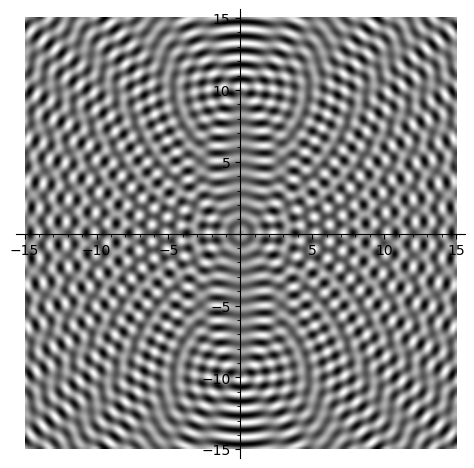

In [4]:
density_plot(static_interference, (x, -15, 15), (y, -15, 15), plot_points=200, aspect_ratio=1)

In [6]:
static_plain_wave = Ep.subs(E0==1, lbd==1, omega==1, t==0)
plain_wave = Ep.subs(E0==1, lbd==1, omega==1)
show(plain_wave)

sin(2*pi*x - t)

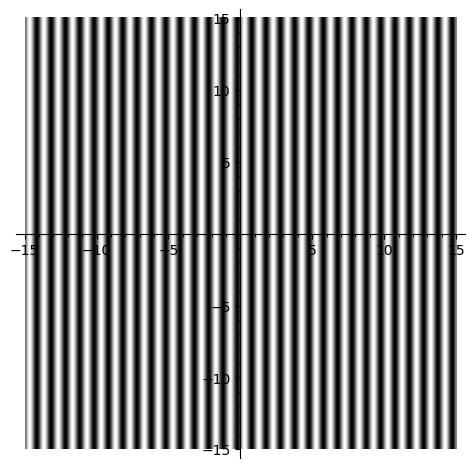

In [7]:
density_plot(static_plain_wave, (x, -15, 15), (y, -15, 15), plot_points=200, aspect_ratio=1)

In [8]:
dependence = plain_wave*heaviside(-x)+interference*heaviside(x)
show(dependence)

(sin(2*pi*sqrt(x^2 + y^2 + 20*y + 100) - t) + sin(2*pi*sqrt(x^2 + y^2 - 20*y + 100) - t) + sin(2*pi*sqrt(x^2 + y^2) - t))*heaviside(x) + heaviside(-x)*sin(2*pi*x - t)

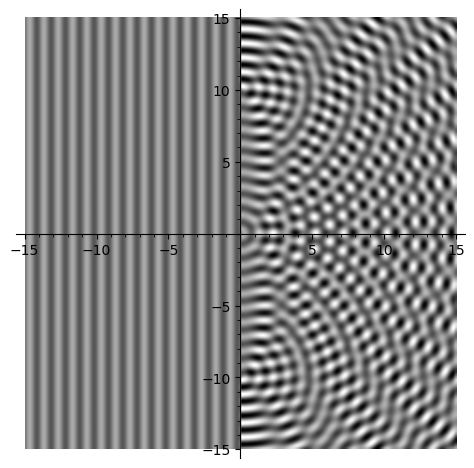

In [9]:
density_plot(dependence.subs(t==0), (x, -15, 15), (y, -15, 15), plot_points=200, aspect_ratio=1)

Animation with 20 frames
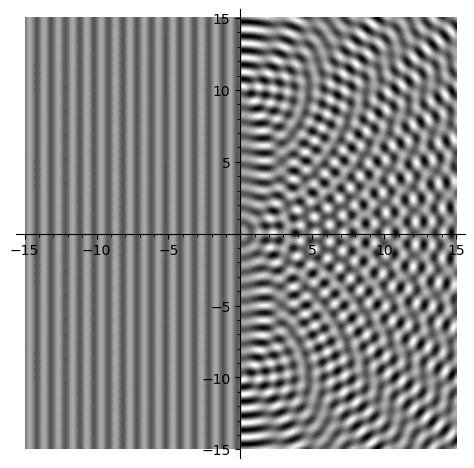

In [11]:
# Aby uruchomić animację w notatniku, należy doinstalować oprogramowanie ImageMagick:
# https://doc.sagemath.org/html/en/reference/plotting/sage/plot/animate.html
# https://doc.sagemath.org/html/en/reference/spkg/imagemagick.html
# from sage.features.imagemagick import ImageMagick

# Ważne, aby ścieżki pod którymi znajdują się zainstalowane programy było dodane do zmiennej środowiskowej PATH
# https://imagemagick.org/script/download.php#macosx
# import os
# os.environ["PATH"]+=":/opt/homebrew/bin/convert"

# Przed uruchomieniem warto upewnić się, że sagemath i jupyter mają dostęp do programu convert:
# from sage.misc.sage_ostools import have_program
# have_program('convert')
# Powyższa komenda powinna zwrócić wartość True

animtab = [density_plot(dependence.subs(t==c), (x, -15, 15), (y, -15, 15), plot_points=200, aspect_ratio=1) for c in sxrange(0,10,.5)]
demo = animate(animtab)       
demo.show() 